In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import operator
import time
import timeit

In [2]:
#pathway networks

G_hem1 = nx.read_gml ("/Users/Iva/Documents/project/data/disease_networks/G_hem1.gml")
G_wdr1 = nx.read_gml ("/Users/Iva/Documents/project/data/disease_networks/G_wdr1.gml")

#random walk networks

G_hem1_rw = nx.read_gml ("/Users/Iva/Documents/project/data/random_walks_networks/G_hem1_rw.gml")
G_wdr1_rw = nx.read_gml ("/Users/Iva/Documents/project/data/random_walks_networks/G_wdr1_rw.gml")

#random walk probability data

hem1_rw = open ("/Users/Iva/Documents/project/data/random_walks/hem1_rw.txt")
wdr1_rw = open ("/Users/Iva/Documents/project/data/random_walks/wdr1_rw.txt")

def rw_dictionary (file):  #makes dictionary with nodes as keys (protein entrez) and rw probabilities (values)
    data_dictionary = {}
    l = []
    for i in file:
        #key, value = i.split()
        #data_dictionary[key] = value
        l.append (i.split())

    data_dictionary = {item[0]:item[1] for item in l}
    return (data_dictionary)

hem1_rw_dictionary = rw_dictionary(hem1_rw)
wdr1_rw_dictionary = rw_dictionary(wdr1_rw)

top_hem1 = list (hem1_rw_dictionary.keys())[:20]
top_wdr1 = list (wdr1_rw_dictionary.keys())[:20]


In [3]:
### opening pathway data

path = "/Users/Iva/Documents/project/data/msigdb_pathways.gmt.txt"
data = open (path)

data_dictionary = {}
l = []
for i in data:
    l.append (i.split())

data_dictionary = {item[0]:item[2:] for item in l}  #dictionary with all pathways

In [34]:
## NOTCH1 pathways
notch1_pathways = {}
for i, j in data_dictionary.items():
    if i.find("NOTCH") >= 0:
        notch1_pathways[i] = j


print ((notch1_pathways))

{'BIOCARTA_NOTCH_PATHWAY': ['5663', '28514', '6868', '3516', '4851', '5045'], 'KEGG_NOTCH_SIGNALING_PATHWAY': ['388585', '196403', '4855', '151636', '4854', '4853', '2033', '3280', '4851', '8650', '5664', '5663', '171558', '22938', '51107', '2648', '6868', '5986', '3516', '1840', '1387', '113878', '9794', '1488', '9612', '1487', '1857', '3714', '1856', '9253', '84441', '8850', '54567', '55851', '10683', '1855', '9541', '28514', '3955', '182', '55534', '3065', '3066', '23385', '23220', '4242', '11317'], 'PID_NOTCH_PATHWAY': ['9611', '4851', '1840', '5045', '23145', '28514', '1759', '171558', '8766', '9148', '1487', '55294', '8650', '867', '4237', '26292', '54567', '9794', '23013', '4609', '6502', '27255', '4853', '5663', '84441', '7528', '2625', '2023', '83737', '3565', '83464', '84708', '9612', '3516', '1026', '3714', '8038', '8788', '2060', '92737', '6500', '4854', '5932', '4855', '182', '51107', '10683', '55851', '8076', '23385', '595', '2033', '3065', '2011', '57534', '102', '8454',

In [4]:
##### MONSTER NETWORK ###########

#data_monster is a list of lists of two interacting protein Entrey names (483644 pairs)
import networkx as nx

path = "/Users/Iva/Documents/project/data/databases/monster_ppi.txt"
data1 = open (path)

data_monster = []
data_monster_nr = []
for i in data1:
    data_monster.append (i.split()[:2])
    
for i in data_monster:
    data_monster_nr.append (i[0])
    data_monster_nr.append (i[1])
    
data_monster_nr = list(set(data_monster_nr))
    
    
G_monster = nx.Graph()
G_monster.add_edges_from(data_monster)

In [57]:
#merge rw and pathway networks
#function that merges two networks and colors one red and other green
def merge (G, H):
    for i in list(G.nodes()):
        G.nodes()[i]["color"] = "green"
    for i in list(H.nodes()):
        H.nodes()[i]["color"] = "red"
    
    return (nx.compose (G, H))

G_hem1_compose = merge (G_hem1, G_hem1_rw)
G_wdr1_compose = merge (G_wdr1, G_wdr1_rw)

## color specific and common proteins

common_hem1 = list(set (G_hem1_rw.nodes()) & set (G_hem1.nodes ()))
#specific for rw
specific_hem1_rw = [i for i in list(G_hem1_rw.nodes()) if i not in common_hem1]
#specific for pathway
specific_hem1 = [i for i in list(G_hem1.nodes()) if i not in common_hem1]

for i in list(G_hem1_compose.nodes()):
    if G_hem1_compose.nodes()[i] in common_hem1:
        G_hem1_compose.nodes()[i]["common rw & literature"]=["yes"]
    if G_hem1_compose.nodes()[i] in specific_hem1_rw:
        G_hem1_compose.nodes()[i]["specific for rw"]=["yes"]
    if G_hem1_compose.nodes()[i] in specific_hem1:
        G_hem1_compose.nodes()[i]["specific for literature"]=["da"]
        
    

nx.write_gml (G_hem1_compose, "/Users/Iva/Documents/project/data/HEM1_WDR1/G_hem1_compose.gml")
nx.write_gml (G_wdr1_compose, "/Users/Iva/Documents/project/data/HEM1_WDR1/G_wdr1_compose.gml")

In [36]:
### ALL PATHWAYS INVOLVED IN DISEASE ACCORDING TO KEYWORDS/PATHWAYS NETWORK

## OPEN
path = "/Users/Iva/Documents/project/data/msigdb_pathways.gmt.txt"
def open_pathway_data(path): #data must be in format path protein1 prot2
    data = open (path)

    data_dictionary = {}
    l = []
    for i in data:
        l.append (i.split())
    data_dictionary = {item[0]:item[2:] for item in l}
    return (data_dictionary)


all_paths_hem1_pathway = open_pathway_data("/Users/Iva/Documents/project/data/disease_networks/disease_pathways/hem1_pathways.txt")
all_paths_wdr1_pathway = open_pathway_data("/Users/Iva/Documents/project/data/disease_networks/disease_pathways/wdr1_pathways.txt")

all_paths_hem1_pathway["rw_hem1"] = list(G_hem1_rw.nodes())
all_paths_wdr1_pathway["rw_wdr1"] = list(G_wdr1_rw.nodes())


notch1_pathways["rw_hem1"] = list(G_hem1_rw.nodes())

In [37]:
#save dictionaries as txt files

def save_pathway_data(dictionary, filename):
    import os.path
    path = "/Users/Iva/Documents/project/data/HEM1_WDR1/pathways_rw_keyword"
    complete_name = os.path.join (path, filename)
    file = open (complete_name, "w+")
    
    for i,j in dictionary.items():
        list1 = []
        list1.append(i)
        list1.extend(j)
        for k in list1:
            file.write(("%s\t" % k))
        file.write ('\n') 
    file.close()


save_pathway_data (all_paths_hem1_pathway, "hem1_rw_pathways")  #pathways used for heatmap
save_pathway_data (all_paths_wdr1_pathway, "wdr1_rw_pathways")
    
    
save_pathway_data (notch1_pathways, "notch1_pathways")

In [58]:
### WHICH PATHWAYS ARE THE CLOSEST TO RW?

#take the output of Julia's script {path1 path2:distance}

def open_distance_data(path): #data must be in format {path1 path2:distance}
    data = open (path)
    data_dictionary = {}
    l = []
    for i in data:
        l.append (i.split())
    data_dictionary = {str(item[0])+","+str(item[1]):item[2] for item in l}
    return (data_dictionary)

hem1_distance_dictionary = open_distance_data("/Users/Iva/Documents/project/data/HEM1_WDR1/pathways_rw_keyword/hem1_pathways_distance.txt")
wdr1_distance_dictionary = open_distance_data("/Users/Iva/Documents/project/data/HEM1_WDR1/pathways_rw_keyword/wdr1_pathways_distance.txt")
print (len(wdr1_distance_dictionary))
hem1_rw_only = {}
wdr1_rw_only = {}

for i,j in hem1_distance_dictionary.items():
    if i.find("rw_hem1") >=0:
        hem1_rw_only[i] = j
        
for i,j in wdr1_distance_dictionary.items():
    if i.find("rw_wdr1") >=0:
        wdr1_rw_only[i] = j
        
#sort all distances from rw  -fisrt the ones that are the closest
import operator
hem1_rw_only = dict (sorted (hem1_rw_only.items(), key = lambda x:float(x[1]), reverse = False))
wdr1_rw_only = dict (sorted (wdr1_rw_only.items(), key = lambda x:float(x[1]), reverse = False))
n = 0
for i, j in hem1_rw_only.items():
    n += 1
    print (i, j)
    if n == 20:
        break


1431
rw_hem1,BIOCARTA_ACTINY_PATHWAY 1.862566844919786
rw_hem1,rw_hem1 1.962023506534359
rw_hem1,REACTOME_FOLDING_OF_ACTIN_BY_CCT_TRIC 1.9772727272727273
rw_hem1,REACTOME_SUMOYLATION_OF_IMMUNE_RESPONSE_PROTEINS 1.9934640522875817
REACTOME_LRR_FLII_INTERACTING_PROTEIN_1_LRRFIP1_ACTIVATES_TYPE_I_IFN_PRODUCTION,rw_hem1 2.016042780748663
REACTOME_RESPONSE_OF_MTB_TO_PHAGOCYTOSIS,rw_hem1 2.0315762668703847
rw_hem1,WP_PROLACTIN_SIGNALING_PATHWAY 2.0426362191068073
rw_hem1,REACTOME_COOPERATION_OF_PREFOLDIN_AND_TRIC_CCT_IN_ACTIN_AND_TUBULIN_FOLDING 2.074348801104019
WP_MFAP5_EFFECT_ON_PERMEABILITY_AND_MOTILITY_OF_ENDOTHELIAL_CELLS_VIA_CYTOSKELETON_REARRANGEMENT,rw_hem1 2.1046122994652405
rw_hem1,REACTOME_RUNX3_REGULATES_IMMUNE_RESPONSE_AND_CELL_MIGRATION 2.1136363636363638
rw_hem1,SIG_REGULATION_OF_THE_ACTIN_CYTOSKELETON_BY_RHO_GTPASES 2.1182952519850917
rw_hem1,WP_REGULATION_OF_MICROTUBULE_CYTOSKELETON 2.1187408847836657
rw_hem1,BIOCARTA_LYMPHOCYTE_PATHWAY 2.1451489686783805
KEGG_FC_GAMMA_R_ME

In [9]:
for i,j in hem1_distance_dictionary.items():
    
    print (i,j)
    print (len(hem1_distance_dictionary))
    break
    
for i,j in wdr1_distance_dictionary.items():
    
    print (i,j)
    print (len(wdr1_distance_dictionary))
    break

WP_REGULATION_OF_ACTIN_CYTOSKELETON,WP_REGULATION_OF_ACTIN_CYTOSKELETON 2.2593133674214756
780
WP_REGULATION_OF_ACTIN_CYTOSKELETON,WP_REGULATION_OF_ACTIN_CYTOSKELETON 2.2593133674214756
1431


[Text(0, 0.5, 'FOLDING_OF_ACTIN_BY_CCT_TRIC'),
 Text(0, 1.5, 'ADAPTIVE_IMMUNE_SYSTEM'),
 Text(0, 2.5, 'LRR_FLII_INTERACTING_PROTEIN_1_LRRFIP1_ACTIVATES_TYPE_I_IFN_PRODUCTION'),
 Text(0, 3.5, 'RUNX1_AND_FOXP3_CONTROL_THE_DEVELOPMENT_OF_REGULATORY_T_LYMPHOCYTES_TREGS_'),
 Text(0, 4.5, 'COOPERATION_OF_PREFOLDIN_AND_TRIC_CCT_IN_ACTIN_AND_TUBULIN_FOLDING'),
 Text(0, 5.5, 'NEGATIVE_REGULATION_OF_TCF_DEPENDENT_SIGNALING_BY_DVL_INTERACTING_PROTEINS'),
 Text(0, 6.5, 'MODULATION_BY_MTB_OF_HOST_IMMUNE_SYSTEM'),
 Text(0, 7.5, 'STING_MEDIATED_INDUCTION_OF_HOST_IMMUNE_RESPONSES'),
 Text(0, 8.5, 'RESPONSE_OF_MTB_TO_PHAGOCYTOSIS'),
 Text(0, 9.5, 'REGULATION_OF_INNATE_IMMUNE_RESPONSES_TO_CYTOSOLIC_DNA'),
 Text(0, 10.5, 'RUNX2_REGULATES_GENES_INVOLVED_IN_CELL_MIGRATION'),
 Text(0, 11.5, 'FCGAMMA_RECEPTOR_FCGR_DEPENDENT_PHAGOCYTOSIS'),
 Text(0, 12.5, 'CYTOKINE_SIGNALING_IN_IMMUNE_SYSTEM'),
 Text(0, 13.5, 'DISEASES_OF_IMMUNE_SYSTEM'),
 Text(0, 14.5, 'ROLE_OF_PHOSPHOLIPIDS_IN_PHAGOCYTOSIS'),
 Text(0, 15.5,

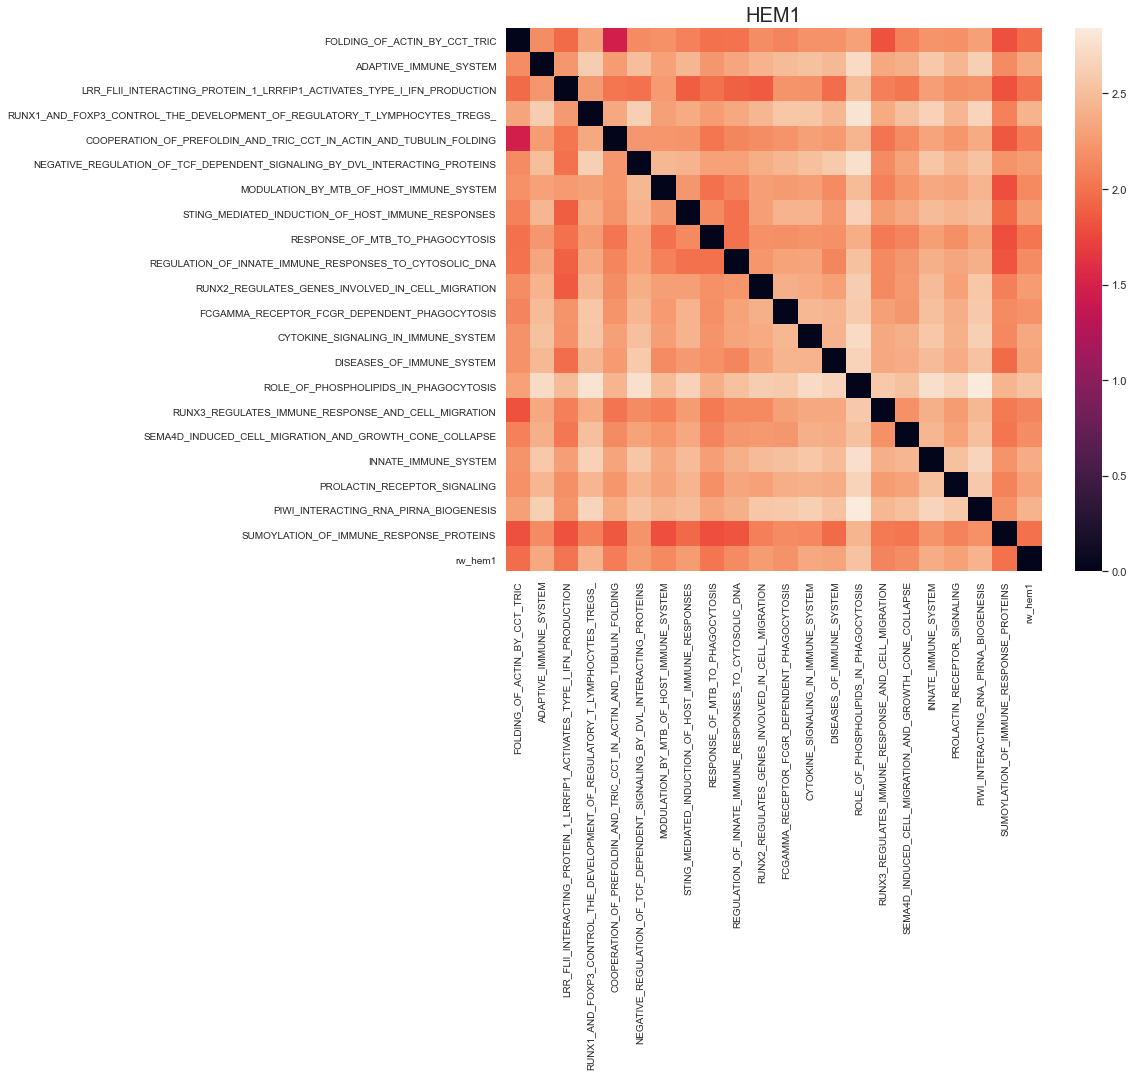

In [13]:
#### HEATMAP

import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()

hem1_names_all = list((open_pathway_data('/Users/Iva/Documents/project/data/HEM1_WDR1/pathways_rw_keyword/hem1_rw_pathways')).keys())
wdr1_names_all = list((open_pathway_data('/Users/Iva/Documents/project/data/HEM1_WDR1/pathways_rw_keyword/wdr1_rw_pathways')).keys())

hem1_names = []
wdr1_names = []

for i in hem1_names_all:
    if i.find("REACTOME") >= 0:
        hem1_names.append(i)
    if i.find("rw_hem1") >= 0:
        hem1_names.append(i)
        
for i in wdr1_names_all:
    if i.find("REACTOME") >= 0:
        wdr1_names.append(i)
    if i.find("rw_wdr1") >= 0:
        wdr1_names.append(i)

matrix = []
for i in hem1_names:
    lista = []
    for j in hem1_names:
        if i == j:
            lista.append(0)
            continue
        str1 = str(i)+","+str(j)
        
        if str1 in list(hem1_distance_dictionary.keys()):
            position = list(hem1_distance_dictionary.keys()).index(str1)
            lista.append(float(list(hem1_distance_dictionary.values())[position]))
            continue
        str2 = str(j)+","+str(i)
        if str2 in list(hem1_distance_dictionary.keys()):
            position = list(hem1_distance_dictionary.keys()).index(str2)
            lista.append(float(list(hem1_distance_dictionary.values())[position]))
            continue
    matrix.append(lista)

hem1_names_clean = []
wdr1_names_clean = []   
for i in hem1_names:
    if i.find("REACTOME") >= 0:
        hem1_names_clean.append(i.replace("REACTOME_", ""))
    if i.find("rw_hem1") >= 0:
        hem1_names_clean.append(i)
        
for i in wdr1_names:
    if i.find("REACTOME") >= 0:
        wdr1_names_clean.append(i.replace("REACTOME_", ""))
    if i.find("rw_wdr1") >= 0:
        wdr1_names_clean.append(i)
        
plt.figure(figsize=(12,10))
ax = sns.heatmap(matrix, xticklabels = hem1_names_clean, yticklabels = hem1_names_clean)
ax.set_title ("HEM1", fontsize = 20)
ax.set_xticklabels(hem1_names_clean, fontsize = 10)
ax.set_yticklabels(hem1_names_clean, fontsize = 10)


[Text(0, 0.5, 'GAP_JUNCTION_ASSEMBLY'),
 Text(0, 1.5, 'PLATELET_CALCIUM_HOMEOSTASIS'),
 Text(0, 2.5, 'FOLDING_OF_ACTIN_BY_CCT_TRIC'),
 Text(0, 3.5, 'FACTORS_INVOLVED_IN_MEGAKARYOCYTE_DEVELOPMENT_AND_PLATELET_PRODUCTION'),
 Text(0, 4.5, 'ADAPTIVE_IMMUNE_SYSTEM'),
 Text(0, 5.5, 'RUNX1_REGULATES_EXPRESSION_OF_COMPONENTS_OF_TIGHT_JUNCTIONS'),
 Text(0, 6.5, 'PLATELET_ADHESION_TO_EXPOSED_COLLAGEN'),
 Text(0, 7.5, 'LRR_FLII_INTERACTING_PROTEIN_1_LRRFIP1_ACTIVATES_TYPE_I_IFN_PRODUCTION'),
 Text(0, 8.5, 'CELL_CELL_JUNCTION_ORGANIZATION'),
 Text(0, 9.5, 'COOPERATION_OF_PREFOLDIN_AND_TRIC_CCT_IN_ACTIN_AND_TUBULIN_FOLDING'),
 Text(0, 10.5, 'NEGATIVE_REGULATION_OF_TCF_DEPENDENT_SIGNALING_BY_DVL_INTERACTING_PROTEINS'),
 Text(0, 11.5, 'PLATELET_AGGREGATION_PLUG_FORMATION_'),
 Text(0, 12.5, 'PLATELET_SENSITIZATION_BY_LDL'),
 Text(0, 13.5, 'MODULATION_BY_MTB_OF_HOST_IMMUNE_SYSTEM'),
 Text(0, 14.5, 'STING_MEDIATED_INDUCTION_OF_HOST_IMMUNE_RESPONSES'),
 Text(0, 15.5, 'TIGHT_JUNCTION_INTERACTIONS'),
 Text

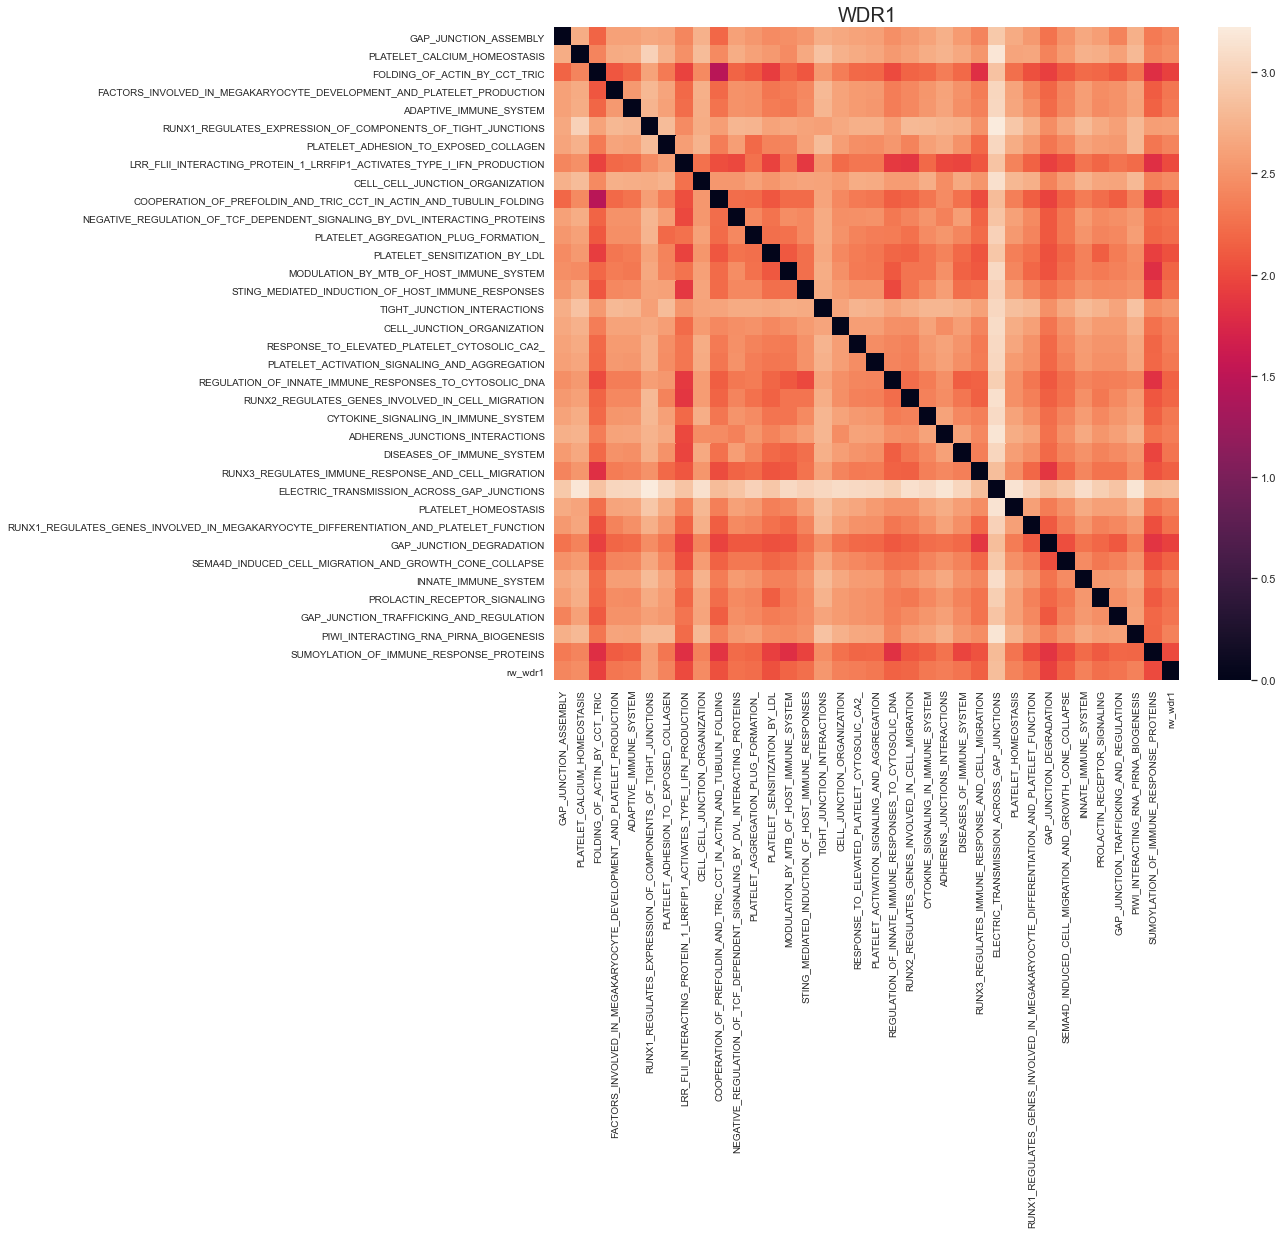

In [14]:
matrix = []
for i in wdr1_names:
    lista = []
    for j in wdr1_names:
        if i == j:
            lista.append(0)
            continue
        str1 = str(i)+","+str(j)
        
        if str1 in list(wdr1_distance_dictionary.keys()):
            position = list(wdr1_distance_dictionary.keys()).index(str1)
            lista.append(float(list(wdr1_distance_dictionary.values())[position]))
            continue
        str2 = str(j)+","+str(i)
        if str2 in list(wdr1_distance_dictionary.keys()):
            position = list(wdr1_distance_dictionary.keys()).index(str2)
            lista.append(float(list(wdr1_distance_dictionary.values())[position]))
            continue
    matrix.append(lista)

plt.figure(figsize=(14,12))
ax = sns.heatmap(matrix, xticklabels = wdr1_names_clean, yticklabels = wdr1_names_clean)
ax.set_title ("WDR1", fontsize = 20)
ax.set_xticklabels(wdr1_names_clean, fontsize = 10)
ax.set_yticklabels(wdr1_names_clean, fontsize = 10)

[Text(0, 0.5, 'BIOCARTA_NOTCH_PATHWAY'),
 Text(0, 1.5, 'KEGG_NOTCH_SIGNALING_PATHWAY'),
 Text(0, 2.5, 'PID_NOTCH_PATHWAY'),
 Text(0, 3.5, 'REACTOME_SIGNALING_BY_NOTCH'),
 Text(0, 4.5, 'REACTOME_PRE_NOTCH_PROCESSING_IN_THE_ENDOPLASMIC_RETICULUM'),
 Text(0, 5.5, 'REACTOME_PRE_NOTCH_PROCESSING_IN_GOLGI'),
 Text(0, 6.5, 'REACTOME_PRE_NOTCH_EXPRESSION_AND_PROCESSING'),
 Text(0, 7.5, 'REACTOME_SIGNALING_BY_NOTCH1'),
 Text(0, 8.5, 'REACTOME_SIGNALING_BY_NOTCH2'),
 Text(0, 9.5, 'REACTOME_NOTCH1_INTRACELLULAR_DOMAIN_REGULATES_TRANSCRIPTION'),
 Text(0, 10.5, 'REACTOME_ACTIVATED_NOTCH1_TRANSMITS_SIGNAL_TO_THE_NUCLEUS'),
 Text(0, 11.5, 'REACTOME_NOTCH2_INTRACELLULAR_DOMAIN_REGULATES_TRANSCRIPTION'),
 Text(0, 12.5, 'REACTOME_SIGNALING_BY_NOTCH1_PEST_DOMAIN_MUTANTS_IN_CANCER'),
 Text(0, 13.5, 'REACTOME_FBXW7_MUTANTS_AND_NOTCH1_IN_CANCER'),
 Text(0, 14.5, 'REACTOME_SIGNALING_BY_NOTCH1_T_7_9_NOTCH1_M1580_K2555_TRANSLOCATION_MUTANT'),
 Text(0, 15.5, 'REACTOME_SIGNALING_BY_NOTCH1_HD_DOMAIN_MUTANTS_IN_CA

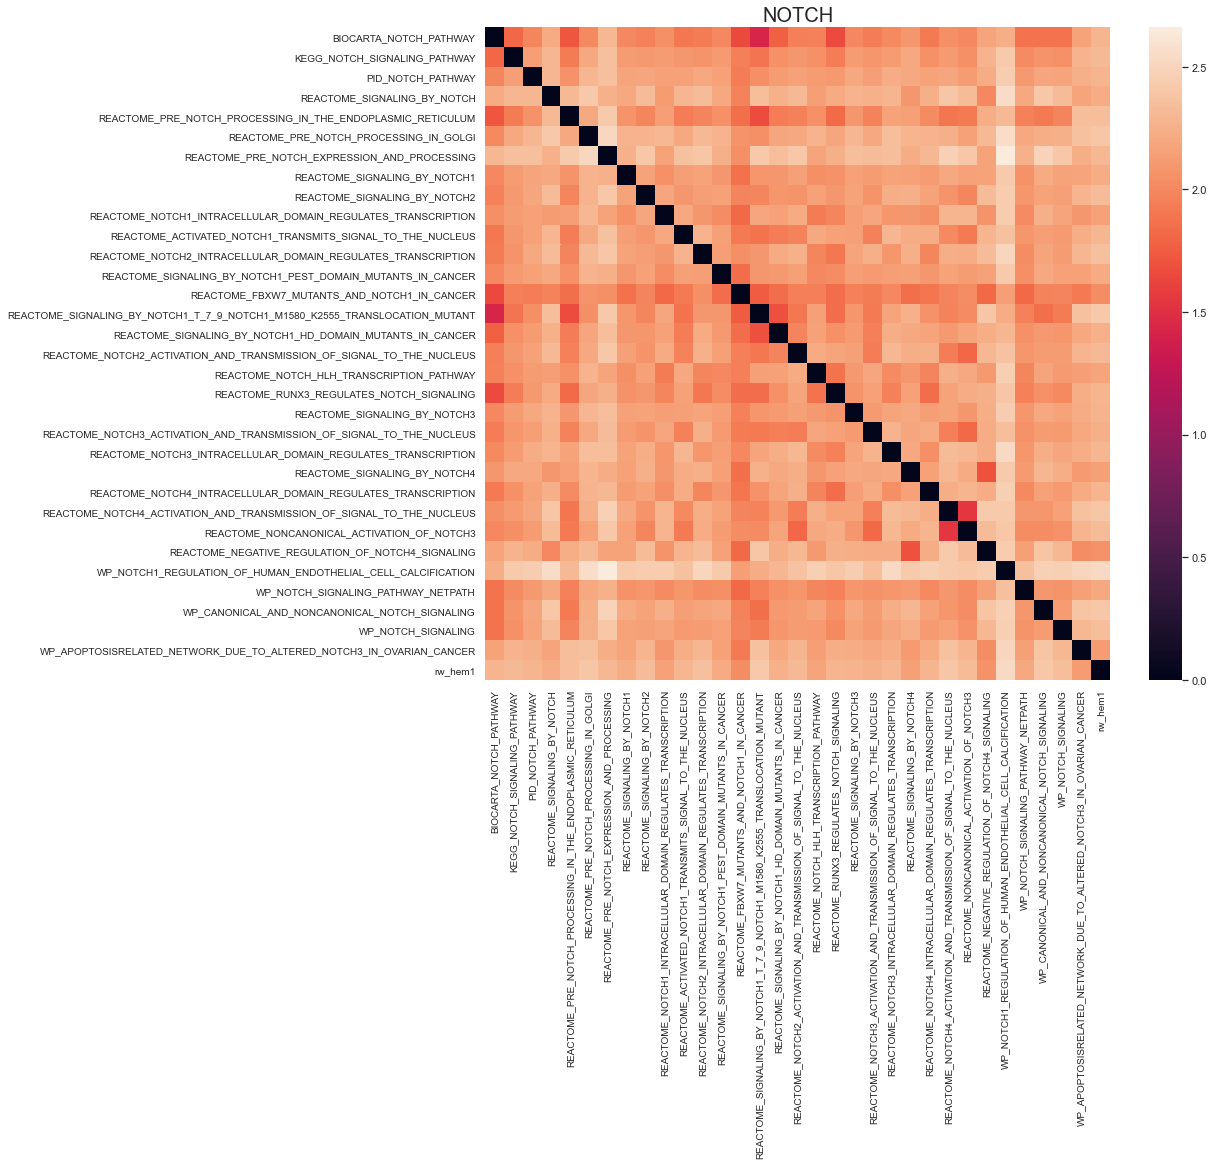

In [43]:
notch_names = list((open_pathway_data('/Users/Iva/Documents/project/data/HEM1_complete_story/notch1_pathways')).keys())
notch_distance_dictionary = open_distance_data('/Users/Iva/Documents/project/data/HEM1_complete_story/notch1_pathway_distance')


matrix = []
for i in notch_names:
    lista = []
    for j in notch_names:
        if i == j:
            lista.append(0)
            continue
        str1 = str(i)+","+str(j)
        
        if str1 in list(notch_distance_dictionary.keys()):
            position = list(notch_distance_dictionary.keys()).index(str1)
            lista.append(float(list(notch_distance_dictionary.values())[position]))
            continue
        str2 = str(j)+","+str(i)
        if str2 in list(notch_distance_dictionary.keys()):
            position = list(notch_distance_dictionary.keys()).index(str2)
            lista.append(float(list(notch_distance_dictionary.values())[position]))
            continue
    matrix.append(lista)

plt.figure(figsize=(14,12))
ax = sns.heatmap(matrix, xticklabels = notch_names, yticklabels = notch_names)
ax.set_title ("NOTCH", fontsize = 20)
ax.set_xticklabels(notch_names, fontsize = 10)
ax.set_yticklabels(notch_names, fontsize = 10)

In [53]:
notch_rw_only = {}

for i,j in notch_distance_dictionary.items():
    if (i.split(","))[0] == "rw_hem1" or (i.split(","))[1] == "rw_hem1":
        notch_rw_only[i] = j
        
        
notch_rw_only = dict (sorted (notch_rw_only.items(), key = lambda x:float(x[1]), reverse = False))

n = 0
for i,j in notch_rw_only.items():
    print (i, j)


rw_hem1,rw_hem1 1.965455117389688
REACTOME_FBXW7_MUTANTS_AND_NOTCH1_IN_CANCER,rw_hem1 2.0267379679144386
REACTOME_NEGATIVE_REGULATION_OF_NOTCH4_SIGNALING,rw_hem1 2.0636666330340026
WP_APOPTOSISRELATED_NETWORK_DUE_TO_ALTERED_NOTCH3_IN_OVARIAN_CANCER,rw_hem1 2.12145207733443
REACTOME_SIGNALING_BY_NOTCH4,rw_hem1 2.14748795140952
REACTOME_NOTCH1_INTRACELLULAR_DOMAIN_REGULATES_TRANSCRIPTION,rw_hem1 2.158721128683582
REACTOME_NOTCH_HLH_TRANSCRIPTION_PATHWAY,rw_hem1 2.180431768667063
WP_NOTCH_SIGNALING_PATHWAY_NETPATH,rw_hem1 2.202139037433155
REACTOME_SIGNALING_BY_NOTCH1_PEST_DOMAIN_MUTANTS_IN_CANCER,rw_hem1 2.2184873949579833
REACTOME_SIGNALING_BY_NOTCH1,rw_hem1 2.228609625668449
REACTOME_SIGNALING_BY_NOTCH,rw_hem1 2.231602264336697
REACTOME_NOTCH3_ACTIVATION_AND_TRANSMISSION_OF_SIGNAL_TO_THE_NUCLEUS,rw_hem1 2.248314345501046
REACTOME_SIGNALING_BY_NOTCH1_HD_DOMAIN_MUTANTS_IN_CANCER,rw_hem1 2.261209378856438
REACTOME_SIGNALING_BY_NOTCH3,rw_hem1 2.2738650585959723
REACTOME_NOTCH4_INTRACELLULA

In [12]:
### FREQUENCY OF PATHWAYS

def pathways_frequency (listofpathways): #returns dictionary with pathways as keys and number of occurence in given list as values
    dict1 = {}
    list_nr = list(set(listofpathways))
  
    for i in list_nr:
        dict1[i] = listofpathways.count (i)
        
    dict1 = dict (sorted (dict1.items(), key = operator.itemgetter(1), reverse = True)) #sorted :)
    return(dict1)  #returns dictionary with pathways as keys and number of occurence in given list as values

pathways_hem1_dict = pathways_frequency (all_paths_hem1_rw)
pathways_wdr1_dict = pathways_frequency (all_paths_wdr1_rw)

#I want only pathways that occur more than 1 time

pathways_hem1_dict_filtered = dict((i,j) for i,j in pathways_hem1_dict.items() if j>5)
pathways_wdr1_dict_filtered = dict((i,j) for i,j in pathways_wdr1_dict.items() if j>5)


pathways_hem1 = list(pathways_hem1_dict_filtered.keys())
pathways_wdr1 = list(pathways_wdr1_dict_filtered.keys())

NameError: name 'all_paths_hem1_rw' is not defined

In [139]:
### DISTANCES BETWEEN RW NETWORK AND PATHWAY NETWORKS
### DISTANCE IS DEFINED AS AVERAGE OF SHORTEST PATHS IN THE NETWORK

### STARTING NETWORK IS COMMON NETWORK
### MAKE NETWORK FROM EACH PATHWYAY

### Makes list of networks that consists of proteins that are in given pathways

def subgraphs_pathways(network, pathways): #network is given big network, pathways is list of pathways
    networks = {}
    for i in pathways:
        G = nx.Graph() #make network for each pathway 
        nodes = []
        for j in list (network.nodes()): #list of nodes that have this pathway
            if ("pathway" in network.nodes()[j]):  
                if network.nodes()[j]["pathway"].find (i) >= 0:
                    nodes.append (j)
        
        G = network.subgraph(nodes)
        networks[i] = G
    return(networks)

#dictionaries of pathway networks {pathway:network}

subgraphs_hem1 = subgraphs_pathways (G_hem1_compose, pathways_hem1) 
subgraphs_wdr1 = subgraphs_pathways (G_wdr1_compose, pathways_wdr1)

#add rw network

subgraphs_hem1["rw"] = G_hem1_rw
subgraphs_wdr1["rw"] = G_wdr1_rw             

In [62]:
####  ADD COLORING ACCORDING TO PATHWAYS IN NETWORK

G_hem1_expression = nx.read_gml("/Users/Iva/Documents/project/data/Expression/G_hem1_expression_bone_marrow_extended_clean_2.gml")


def color_pathway (network, pathway, color):
    
    for i in list (network.nodes()):
        if ("pathway" in network.nodes()[i]):  
            if network.nodes()[i]["pathway"].find (pathway) >= 0:
                network.nodes()[i][str(pathway)] = color
            
    return (network)

hem1_innate = color_pathway (G_hem1_compose, "REACTOME_INNATE_IMMUNE_SYSTEM", "pink")
G_hem1_expression = color_pathway (G_hem1_expression, 'REACTOME_MTOR_SIGNALLING', "yes") 
#G_hem1_expression = color_pathway (G_hem1_expression, 'REACTOME_SIGNALING_BY_NOTCH1', "yes") 

nx.write_gml(G_hem1_expression, "/Users/Iva/Documents/project/data/HEM1_complete_story/G_hem1_expression_annotated.gml")
nx.write_gml(hem1_innate, "/Users/Iva/Documents/project/data/HEM1_WDR1/hem1_innate.gml" )
 
    



In [ ]:
### ADD COLORING TO NODES IN THE NETWORK

def color_pathway (network, pathway, color):
    
    for i in list (network.nodes()):
        if ("pathway" in network.nodes()[i]):  
            if network.nodes()[i]["pathway"].find (pathway) >= 0:
                network.nodes()[i][str(pathway)] = color
            
    return (network)

hem1_innate = color_pathway (G_hem1_compose, "REACTOME_INNATE_IMMUNE_SYSTEM", "pink")
    
nx.write_gml(hem1_innate, "/Users/Iva/Documents/project/data/HEM1_WDR1/hem1_innate.gml" )







In [ ]:
#############################  TRASH.    ######################################

In [143]:
##### CREATE DICTIONARY WITH DISTANCES OF ALL PATHWAYS TO RW IN MONSTER
##### {PATHWAY1,PATHWAY2:DISTANCE}

'''
t0 = time.time()

data_dictionary_rw = data_dictionary
data_dictionary_rw["rw_hem1"] = list(G_hem1_rw.nodes())
data_dictionary_rw["rw_wdr1"] = list(G_wdr1_rw.nodes())


## function needs datat_dictionary_rw (dictionary of pathways and proteins) and 
#proteins_all (list of prot in distance matrix at exact order)
def distance_pathways(listofpathways, distancematrix): #distance matrix of nodes
    d = {}    
    for i in listofpathways:

        distance_list = []
        
        i_common = list (set(data_dictionary_rw[i]) & set(data_dictionary_rw['rw_hem1'])) #intersection i and rw
        i_nr =[i for i in data_dictionary_rw[i] if i not in i_common]
        rw_nr = [i for i in data_dictionary_rw['rw_hem1'] if i not in i_common]
        l_delta = len (data_dictionary_rw[i]) - len(i_common) #difference 
        ni = 0
        for k in i_nr:
            ni+=1
            nj = 0
            for l in rw_nr: #k & l are nodes
                nj+=1
                if nj > ni:  #we calculate only half of the matrix
                    break
                if (l in proteins_all) and (k in proteins_all):
                    distance_list.append (distancematrix[proteins_all.index(k)][proteins_all.index(l)])
                if k in proteins_all == False:
                    distance_list.append ("NA")
                    continue
                if l in proteins_all == False:
                    distance_list.append ("NA")
                    continue
    
        distance_list = [i for i in distance_list if str(i) != 'NA']
        d[str(i) + "," + 'rw_hem1'] = sum(distance_list)/(len(distance_list) + len(i_common))
        print (ni, float(time.time()-t0))
    return (d)


pathways_hem1_final = ["rw_hem1"] + pathways_hem1
pathways_wdr1_final = ["rw_wdr1"] + pathways_wdr1

c = distance_pathways (pathways_hem1_final[:5], a)                
#b = distance_pathways (G_monster, pathways_wdr1_final) 

file = open ("pathway_hem1.txt", "w")
for i in list(c.keys()):
    index = i.find(",")
    file.write(i[:index] + '\t' + i[index+1:] + '\t' + str(c[i]) + '\n')
file.close()


for i in distance_matrix:
    for j in i: 
        file.write (str(j) + '\t')
    file.write('\n')
file.close()

file = open ("pathway_hem1.txt", "w")
file.write (str(a))
file.close()

file2 = open ("pathway_wdr1.txt", "w")
file2.write (str(b))
file2.close()

'''
       





'\nt0 = time.time()\n\ndata_dictionary_rw = data_dictionary\ndata_dictionary_rw["rw_hem1"] = list(G_hem1_rw.nodes())\ndata_dictionary_rw["rw_wdr1"] = list(G_wdr1_rw.nodes())\n\n\n## function needs datat_dictionary_rw (dictionary of pathways and proteins) and \n#proteins_all (list of prot in distance matrix at exact order)\ndef distance_pathways(listofpathways, distancematrix): #distance matrix of nodes\n    d = {}    \n    for i in listofpathways:\n\n        distance_list = []\n        \n        i_common = list (set(data_dictionary_rw[i]) & set(data_dictionary_rw[\'rw_hem1\'])) #intersection i and rw\n        i_nr =[i for i in data_dictionary_rw[i] if i not in i_common]\n        rw_nr = [i for i in data_dictionary_rw[\'rw_hem1\'] if i not in i_common]\n        l_delta = len (data_dictionary_rw[i]) - len(i_common) #difference \n        ni = 0\n        for k in i_nr:\n            ni+=1\n            nj = 0\n            for l in rw_nr: #k & l are nodes\n                nj+=1\n             

In [ ]:
'''
### ALL pathways involved in disease according to random walk and pathway network

all_paths_hem1_rw = []
all_paths_wdr1_rw = []

for i in list (G_hem1_rw.nodes()):
    if ("pathway" in G_hem1_rw.nodes()[i]):
        all_paths_hem1_rw.extend ((G_hem1_rw.nodes()[i]["pathway"]).split(","))
        
for i in list (G_wdr1_rw.nodes()):
    if ("pathway" in G_wdr1_rw.nodes()[i]):
        all_paths_wdr1_rw.extend ((G_wdr1_rw.nodes()[i]["pathway"]).split(","))
        
        
##MERGE THE TWO

all_paths_hem1_merge = list(set(all_paths_hem1_rw + list(all_paths_hem1_pathway.keys()))) #MERGE RW AND pathway
all_paths_wdr1_merge = list(set(all_paths_wdr1_rw + list(all_paths_wdr1_pathway.keys())))

all_paths_hem1_merge.remove("")
all_paths_wdr1_merge.remove("")


#MAKE DICTIONARIES
all_paths_hem1_dict = {}
all_paths_wdr1_dict = {}

for i in all_paths_hem1_merge:
    all_paths_hem1_dict[i] = data_dictionary[i]
    
for i in all_paths_wdr1_merge:
    all_paths_wdr1_dict[i] = data_dictionary[i]
    
all_paths_hem1 = all_paths_hem1_dict #dict of all pathways according to rw
all_paths_wdr1 = all_paths_wdr1_dict

#ADD RW AS ANOTHER PATHWAY

all_paths_hem1["rw_hem1"] = list(G_hem1_rw.nodes())
all_paths_wdr1["rw_wdr1"] = list(G_wdr1_rw.nodes())

'''

In [ ]:

'''

def distance_matrix_nodes(network, listofnodes):  #this function will calculate distance matrix of nodes in network
    ni = 0
    distance_matrix = []
    t0 = time.time()
    for i in listofnodes:
        distance_list = []  
        nj = 0
        ni += 1
        for j in listofnodes:
            nj += 1
            if nj < ni:  ## we calculate only one half of the matrix - it is symetric        
                if i == j:
                    distance_list.append (0)           
                    continue
                if (i in network) == False:
                    distance_list.append (0)
                    continue
                if (j in network) == False:
                    distance_list.append (0)
                    continue
                if (i != j) & (nx.has_path(network, i, j)):
                    distance_list.append(len (nx.shortest_path(network, source = i, target = j)))
            if nj >= ni: 
                l = [0]
                distance_list.extend (l* (len(listofnodes)- (nj-1)))
                break
        distance_matrix.append(distance_list)
    return (distance_matrix)


a = distance_matrix_nodes (G_monster, proteins_all)
'''